In [2]:
import pandas as pd

In [2]:
twitter_df = pd.read_csv('TwitterDataSentimentScore.csv')
twitter_df.head(15)

,date,clean_text,ticker,sentiment_label,sentiment_score,sentiment
0,11/14/2023,crazy that prime is going to 1b market cap at ...,"PRIME,AXS",LABEL_0,0.641406,Negative
1,11/14/2023,crazy part is a lot of what i have been tradin...,MATIC,LABEL_1,0.695598,Neutral
2,11/14/2023,avax stacking on support,AVAX,LABEL_1,0.827884,Neutral
3,11/14/2023,sol lfg,SOL,LABEL_1,0.628438,Neutral
4,11/14/2023,inj twitter been super bullish on this one and...,INJ,LABEL_2,0.683592,Positive
5,11/15/2023,bonk looks ready to get sent,BONK,LABEL_1,0.729289,Neutral
6,11/15/2023,btc when you zoom out all good and we burned o...,BTC,LABEL_2,0.541535,Positive
7,11/15/2023,matic,MATIC,LABEL_1,0.536114,Neutral
8,11/15/2023,rt bigchonis btc quick video update on bitcoin,BTC,LABEL_1,0.915873,Neutral
9,11/15/2023,25e buy from a 2m wallet few 10e buys earlier ...,PAAL,LABEL_1,0.849537,Neutral


In [3]:
news_df = pd.read_csv('NewsDataSentimentScore.csv')
news_df.head(15)

,ticker,company,description,date,sentiment_label,sentiment_score
0,AAPL,Apple Inc.,These are the stocks posting the largest moves...,04/11/2025,Neutral,0.999930
1,AAPL,Apple Inc.,Tech giant Apple (AAPL) is planning to send mo...,04/08/2025,Neutral,0.999819
2,AAPL,Apple Inc.,Apple’s (AAPL) market capitalization has falle...,04/08/2025,Negative,0.998158
3,AAPL,Apple Inc.,These are the stocks posting the largest moves...,04/07/2025,Neutral,0.999930
4,AAPL,Apple Inc.,A total of $11.1 trillion has been wiped off t...,04/05/2025,Neutral,0.999938
5,AAPL,Apple Inc.,These are the stocks posting the largest moves...,01/31/2025,Neutral,0.998953
6,AAPL,Apple Inc.,Analysts on Wall Street are responding favorab...,01/31/2025,Positive,1.000000
7,AAPL,Apple Inc.,"The report was filed on January 31, 2025",01/31/2025,Neutral,0.999983
8,AAPL,Apple Inc.,Analysts are concerned about how Apple will si...,01/30/2025,Negative,1.000000
9,AAPL,Apple Inc.,These are the stocks posting the largest moves...,01/21/2025,Neutral,0.999930


In [4]:
# Weigthed Score

def weighted_score(label, score):
    if label == "Positive":
        return score
    elif label == "Negative":
        return -score
    else:
        return 0

twitter_df["weighted_score"] = twitter_df.apply(lambda row: weighted_score(row["sentiment"], row["sentiment_score"]), axis=1)
news_df["weighted_score"] = news_df.apply(lambda row: weighted_score(row["sentiment_label"], row["sentiment_score"]), axis=1)

In [5]:
# cleaning ticker per row if more than 2 tickers present in one row

twitter_df['ticker'] = twitter_df['ticker'].astype(str)  # handle NaNs safely
twitter_df = twitter_df.dropna(subset=['ticker'])        # drop missing tickers
twitter_df['ticker'] = twitter_df['ticker'].str.upper()  # consistency

# Explode to handle multiple tickers
twitter_df['ticker'] = twitter_df['ticker'].str.split(',')
twitter_df = twitter_df.explode('ticker')
twitter_df['ticker'] = twitter_df['ticker'].str.strip() 

In [7]:

twitter_agg = twitter_df.groupby(['date', 'ticker'])['weighted_score'].mean().reset_index()
twitter_agg.rename(columns={"weighted_score": "twitter_score"}, inplace=True)

news_agg = news_df.groupby(['date', 'ticker'])['weighted_score'].mean().reset_index()
news_agg.rename(columns={"weighted_score": "news_score"}, inplace=True)

In [11]:
# Merge Twitter and News sentiment scores
merged_sentiment = pd.merge(news_agg, twitter_agg, on=['date', 'ticker'], how='outer').fillna(0)

#  65% news, 35% twitter 
merged_sentiment['final_sentiment_score'] = (
    0.65 * merged_sentiment['news_score'] +
    0.35 * merged_sentiment['twitter_score']
)

In [17]:
merged_sentiment = pd.read_csv('MergedSentimentScore.csv')
merged_sentiment.head(15)

,date,ticker,news_score,twitter_score,final_sentiment_score
0,01/01/2021,AMG,0.000000,0.00000,0.000000
1,01/01/2021,MSCI,0.000000,0.00000,0.000000
2,01/01/2021,TTC,0.000000,0.00000,0.000000
3,01/01/2021,VZ,0.000000,0.00000,0.000000
4,01/01/2022,ADC,0.000000,0.00000,0.000000
5,01/01/2022,AIT,0.000000,0.00000,0.000000
6,01/01/2022,CMG,0.000000,0.00000,0.000000
7,01/01/2022,KNF,0.000000,0.00000,0.000000
8,01/01/2022,PNC,0.000000,0.00000,0.000000
9,01/01/2022,WEC,0.941543,0.00000,0.612003


In [19]:
# Handling lag in stock movement duee to sentiment

# Sort values by ticker and date to prepare for lag features
merged_sentiment = merged_sentiment.sort_values(by=['ticker', 'date']).reset_index(drop=True)

# 1-day lag of final sentiment score
merged_sentiment['sentiment_1d'] = merged_sentiment.groupby('ticker')['final_sentiment_score'].shift(1)

# 3-day rolling average
merged_sentiment['sentiment_3d_avg'] = merged_sentiment.groupby('ticker')['final_sentiment_score'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)

# 7-day rolling average
merged_sentiment['sentiment_7d_avg'] = merged_sentiment.groupby('ticker')['final_sentiment_score'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)


In [24]:
merged_sentiment.head(15)

,date,ticker,news_score,twitter_score,final_sentiment_score,sentiment_1d,sentiment_3d_avg,sentiment_7d_avg
0,02/11/2024,0KN,0.0,0.657259,0.230041,NaN,0.230041,0.230041
1,02/12/2024,0KN,0.0,0.973765,0.340818,0.230041,0.285429,0.285429
2,02/20/2024,0X0,0.0,0.000000,0.000000,NaN,0.000000,0.000000
3,02/23/2024,0X0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,03/20/2023,0X0,0.0,-0.266376,-0.093232,0.000000,-0.031077,-0.031077
5,03/21/2024,0X0,0.0,0.934772,0.327170,-0.093232,0.077980,0.058485
6,03/31/2023,0X0,0.0,0.000000,0.000000,0.327170,0.077980,0.046788
7,03/31/2024,0X0,0.0,0.000000,0.000000,0.000000,0.109057,0.038990
8,04/01/2024,0X0,0.0,0.000000,0.000000,0.000000,0.000000,0.033420
9,04/02/2024,0X0,0.0,0.000000,0.000000,0.000000,0.000000,0.033420


In [26]:
stocks_df = pd.read_csv('daily-stocks-21-24.csv')
stocks_df.head(15)

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_16953/990002530.py:1: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  stocks_df = pd.read_csv('daily-stocks-21-24.csv')


,PERMNO,date,TICKER,COMNAM,CUSIP,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,NUMTRD,RETX,sprtrn
0,10104,12/27/2021,ORCL,ORACLE CORP,68389X10,NaN,89.0200,90.3300,89.54,7668988.0,-0.002006,89.53,89.54,2733686.0,NaN,-0.002006,0.013839
1,10104,12/28/2021,ORCL,ORACLE CORP,68389X10,NaN,88.5200,89.8000,88.65,5614472.0,-0.00994,88.65,88.68,2733686.0,NaN,-0.00994,-0.001010
2,10104,12/29/2021,ORCL,ORACLE CORP,68389X10,NaN,87.7164,89.1900,88.21,5628531.0,-0.004963,88.21,88.22,2733686.0,NaN,-0.004963,0.001402
3,10104,12/30/2021,ORCL,ORACLE CORP,68389X10,NaN,87.7700,88.9100,88.01,7382356.0,-0.002267,88.01,88.02,2733686.0,NaN,-0.002267,-0.002990
4,10104,12/31/2021,ORCL,ORACLE CORP,68389X10,NaN,87.1800,88.1000,87.21,5908158.0,-0.00909,87.20,87.21,2670447.0,NaN,-0.00909,-0.002626
5,10104,01/03/2022,ORCL,ORACLE CORP,68389X10,NaN,85.7600,87.9400,87.90,10653484.0,0.007912,87.90,87.91,2670447.0,NaN,0.007912,0.006374
6,10104,01/04/2022,ORCL,ORACLE CORP,68389X10,NaN,87.7300,89.5843,88.84,11958975.0,0.010694,88.87,88.88,2670447.0,NaN,0.010694,-0.000630
7,10104,01/05/2022,ORCL,ORACLE CORP,68389X10,NaN,86.2200,88.6000,86.46,11236680.0,-0.02679,86.46,86.47,2670447.0,NaN,-0.02679,-0.019393
8,10104,01/06/2022,ORCL,ORACLE CORP,68389X10,0.32,85.5500,87.4189,86.34,7918392.0,0.002313,86.33,86.34,2670447.0,NaN,-0.001388,-0.000964
9,10104,01/07/2022,ORCL,ORACLE CORP,68389X10,NaN,86.2801,88.0000,87.51,9836795.0,0.013551,87.50,87.51,2670447.0,NaN,0.013551,-0.004050


In [27]:
# Rename for better visibility and keep only the columns which will be helful in fetaure egineering and modeling

stocks_df.rename(columns={
    'TICKER': 'ticker',
    'PRC': 'price',
    'VOL': 'volume',
    'RET': 'daily_return',
    'DIVAMT': 'dividend',
    'BIDLO': 'low_bid',
    'ASKHI': 'high_ask',
    'sprtrn': 'sp500_return'
}, inplace=True)

# Filter only relevant columns for modeling
stocks_df = stocks_df[['date', 'ticker', 'price', 'volume', 'daily_return',
                       'dividend', 'low_bid', 'high_ask', 'sp500_return']]

In [29]:
# merging stocks data with sentiments

stocks_df['date'] = stocks_df['date'].astype(str)
stocks_df['ticker'] = stocks_df['ticker'].str.upper()

merged_sentiment['date'] = merged_sentiment['date'].astype(str)
merged_sentiment['ticker'] = merged_sentiment['ticker'].str.upper()

# Merge
full_df = pd.merge(stocks_df, merged_sentiment, on=['date', 'ticker'], how='inner')

In [3]:
full_df = pd.read_csv('Stocks_MergedSentiments_Combined.csv')
full_df.head(15)

,date,ticker,price,volume,daily_return,dividend,low_bid,high_ask,sp500_return,news_score,twitter_score,final_sentiment_score,sentiment_1d,sentiment_3d_avg,sentiment_7d_avg
0,01/21/2022,ORCL,82.22,11608986.0,-0.006044,NaN,82.0300,83.3900,-0.018915,0.000000,0.000000,0.000000,0.000000,-0.216667,-0.216667
1,02/17/2022,ORCL,75.53,9247133.0,-0.046218,NaN,75.3300,78.9800,-0.021173,0.000000,0.000000,0.000000,-0.649991,-0.216664,-0.092856
2,03/09/2022,ORCL,76.10,8959496.0,0.037774,NaN,74.6900,76.9500,0.025698,0.000000,0.000000,0.000000,0.324999,0.259342,0.202359
3,03/10/2022,ORCL,76.65,13812596.0,0.007227,NaN,75.0300,76.8500,-0.004292,-1.000000,0.000000,-0.650000,0.320458,-0.109847,0.064069
4,05/24/2022,ORCL,69.03,6644122.0,-0.01442,NaN,68.3100,70.5300,-0.008121,0.000000,0.000000,0.000000,0.000000,0.108058,0.094929
5,06/03/2022,ORCL,71.79,8169519.0,-0.018458,NaN,71.2273,72.9550,-0.016347,0.000000,0.000000,0.000000,0.000000,0.000000,0.045453
6,06/07/2022,ORCL,72.69,5675655.0,-0.003837,NaN,71.5900,73.1300,0.009523,0.000000,0.000000,0.000000,0.000000,0.000000,0.045453
7,06/13/2022,ORCL,64.05,16547246.0,-0.046023,NaN,63.7600,66.1000,-0.038768,1.000000,0.000000,0.650000,0.325000,0.325000,0.169556
8,06/14/2022,ORCL,70.72,29661295.0,0.104137,NaN,69.0200,72.4300,-0.003774,0.000000,0.000000,0.000000,0.650000,0.325000,0.169556
9,06/16/2022,ORCL,68.71,10685987.0,-0.014204,NaN,67.5800,68.9600,-0.032512,0.000000,0.412748,0.144462,0.000000,0.178154,0.215637


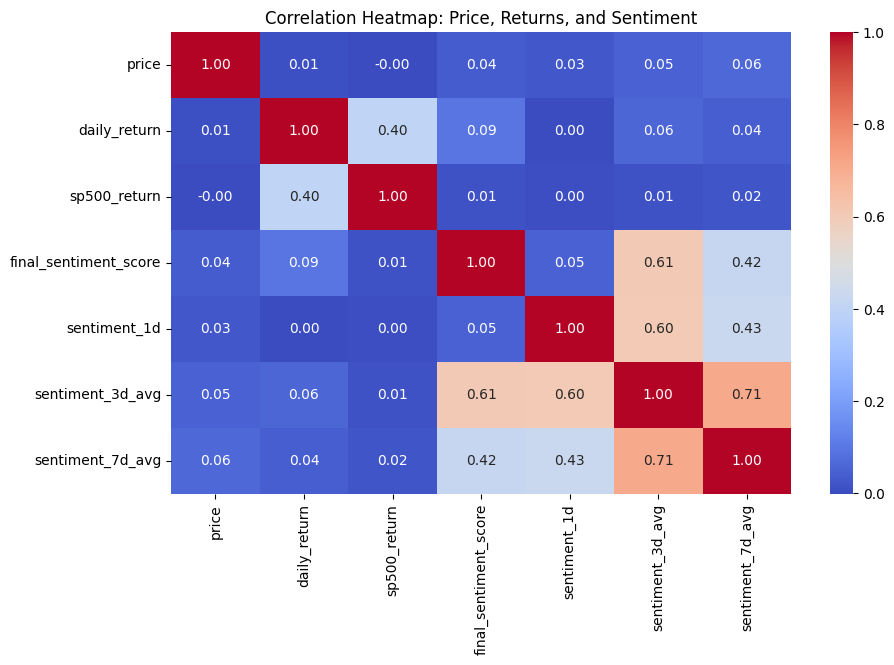

In [4]:
# Ensure numeric types and remove rows with non-numeric issues
cols_to_check = ['price', 'daily_return', 'sp500_return', 'final_sentiment_score', 'sentiment_1d', 'sentiment_3d_avg', 'sentiment_7d_avg']

# Convert to numeric, force errors to NaN
for col in cols_to_check:
    full_df[col] = pd.to_numeric(full_df[col], errors='coerce')

# Drop rows with NaNs in any of these columns
corr_df = full_df[cols_to_check].dropna()

# Now plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Price, Returns, and Sentiment")
plt.show()

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_19462/4187945268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.values, y=volatility.index, palette="mako")


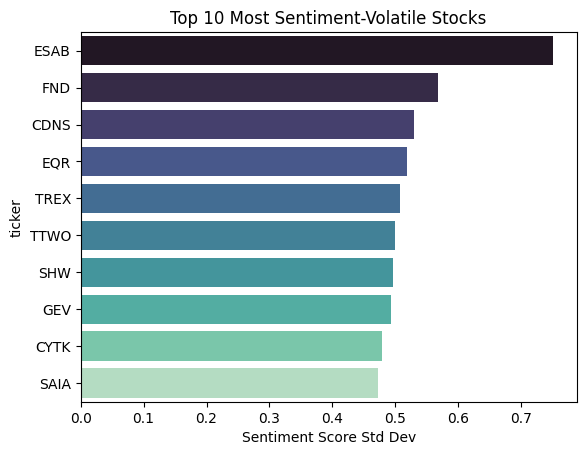

In [5]:
volatility = full_df.groupby('ticker')['final_sentiment_score'].std().sort_values(ascending=False).head(10)
sns.barplot(x=volatility.values, y=volatility.index, palette="mako")
plt.title("Top 10 Most Sentiment-Volatile Stocks")
plt.xlabel("Sentiment Score Std Dev")
plt.show()

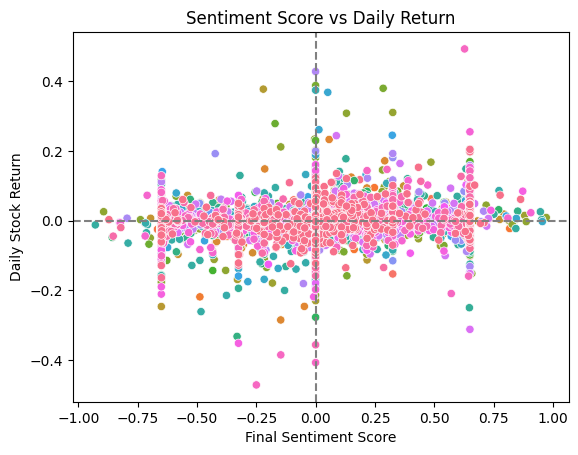

In [6]:
sns.scatterplot(data=full_df, x='final_sentiment_score', y='daily_return', hue='ticker', legend=False)
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.title("Sentiment Score vs Daily Return")
plt.xlabel("Final Sentiment Score")
plt.ylabel("Daily Stock Return")
plt.show()

/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_19462/3108195016.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = full_df.groupby('sentiment_bin')['daily_return'].mean().reset_index()
/var/folders/nz/yglwkh0d003_mjjfnfrm07y40000gn/T/ipykernel_19462/3108195016.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bin_means, x='sentiment_bin', y='daily_return', palette='coolwarm')


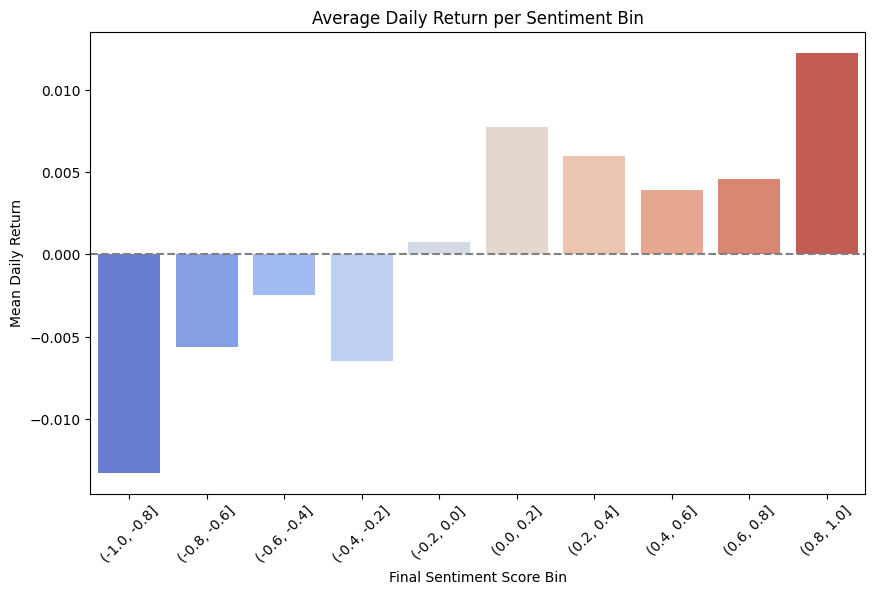

In [7]:
import numpy as np
# Bin the sentiment scores
full_df['sentiment_bin'] = pd.cut(full_df['final_sentiment_score'], bins=np.linspace(-1, 1, 11))

# Group by bin and get mean return
bin_means = full_df.groupby('sentiment_bin')['daily_return'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=bin_means, x='sentiment_bin', y='daily_return', palette='coolwarm')

plt.xticks(rotation=45)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Average Daily Return per Sentiment Bin")
plt.xlabel("Final Sentiment Score Bin")
plt.ylabel("Mean Daily Return")
plt.show()

In [25]:
# checking strong sentiment

sentiment_strong_df = full_df[(full_df['twitter_score'] != 0) & (full_df['news_score'] != 0)].copy()

tsla_strong_df = sentiment_strong_df[sentiment_strong_df['ticker'] == 'TSLA'].copy()

# Ensure date is datetime and sorted
tsla_strong_df['date'] = pd.to_datetime(tsla_strong_df['date'], format='%m/%d/%Y')
tsla_strong_df = tsla_strong_df.sort_values('date')

tsla_strong_df.head(15)

,date,ticker,price,volume,daily_return,dividend,low_bid,high_ask,sp500_return,news_score,twitter_score,final_sentiment_score,sentiment_1d,sentiment_3d_avg,sentiment_7d_avg,sentiment_bin
24551,2023-04-10,TSLA,184.50999,142094798.0,-0.002972,NaN,176.11000,185.10001,0.000996,-0.491872,-0.193715,-0.387517,0.233721,-0.051265,-0.010032,"(-0.4, -0.2]"
24557,2023-04-19,TSLA,180.59000,125890342.0,-0.020183,NaN,177.64999,183.50000,-0.000084,-0.619129,0.052359,-0.384108,-0.332481,-0.238863,-0.127556,"(-0.4, -0.2]"
24558,2023-04-20,TSLA,162.99001,210784506.0,-0.097458,NaN,160.56000,169.70000,-0.005953,-0.333332,-0.298192,-0.321033,0.000000,-0.235047,-0.179178,"(-0.4, -0.2]"
24559,2023-04-21,TSLA,165.08000,123424274.0,0.012823,NaN,161.32080,166.00000,0.000903,0.493678,0.168327,0.379805,0.000000,0.019591,-0.093974,"(0.2, 0.4]"
24560,2023-04-24,TSLA,162.55000,139998978.0,-0.015326,NaN,158.61000,165.64999,0.000852,-0.499984,0.436199,-0.172320,-0.162622,-0.166157,-0.062814,"(-0.2, 0.0]"
24570,2023-05-12,TSLA,167.98000,157712145.0,-0.023826,NaN,167.23000,177.38000,-0.001583,0.323299,0.189135,0.276341,0.078353,0.118232,0.038541,"(0.2, 0.4]"
24584,2023-06-02,TSLA,213.97000,164297257.0,0.031081,NaN,209.75200,217.25000,0.014534,0.499985,0.279886,0.422950,0.000000,0.163482,0.097177,"(0.4, 0.6]"
24586,2023-06-06,TSLA,221.31000,146785221.0,0.017003,NaN,212.53000,221.91000,0.002354,-0.500000,0.328852,-0.209902,0.110647,0.047113,0.051034,"(-0.4, -0.2]"
24608,2023-07-18,TSLA,293.34000,112389541.0,0.010194,NaN,286.01001,295.26001,0.007117,0.007464,0.236006,0.087454,0.000000,0.054814,0.030222,"(0.0, 0.2]"
24629,2023-08-21,TSLA,231.28000,135644088.0,0.073275,NaN,220.58000,232.13429,0.006879,0.999994,0.363389,0.777182,-0.100664,0.332398,0.118974,"(0.6, 0.8]"


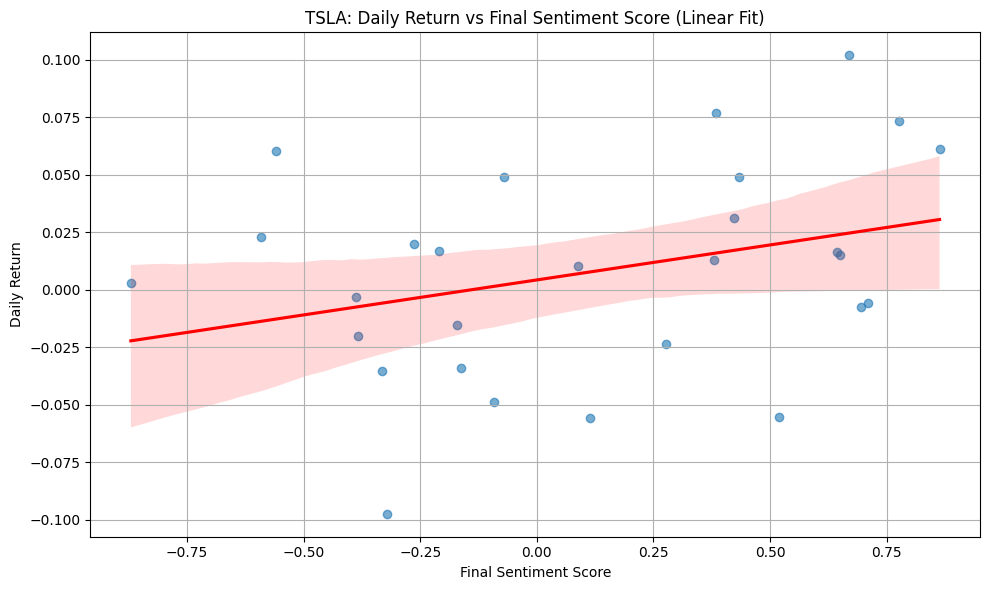

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=tsla_strong_df,
    x='final_sentiment_score',
    y='daily_return',
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.6}
)
plt.title("TSLA: Daily Return vs Final Sentiment Score (Linear Fit)")
plt.xlabel("Final Sentiment Score")
plt.ylabel("Daily Return")
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
df = pd.read_csv('Stocks_MergedSentiments_Combined.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24815 entries, 0 to 24814
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   24815 non-null  object 
 1   ticker                 24815 non-null  object 
 2   price                  24815 non-null  float64
 3   volume                 24815 non-null  float64
 4   daily_return           24815 non-null  object 
 5   dividend               274 non-null    float64
 6   low_bid                24815 non-null  float64
 7   high_ask               24815 non-null  float64
 8   sp500_return           24815 non-null  float64
 9   news_score             24815 non-null  float64
 10  twitter_score          24815 non-null  float64
 11  final_sentiment_score  24815 non-null  float64
 12  sentiment_1d           24538 non-null  float64
 13  sentiment_3d_avg       24815 non-null  float64
 14  sentiment_7d_avg       24815 non-null  float64
dtypes: